# Railroad Diagrams

BNF -> Railroad

by ChatGPT and Raygan
2024-01-22

In [177]:
# Setup
from IPython.display import Image, HTML, SVG
from io import StringIO

# CORRECTED from ChatGPT
from railroad import Diagram, Choice, Optional, ZeroOrMore, OneOrMore, Terminal
from railroad import Start

def bnf_to_railroad(bnf_str):    
    
    def process_rule(rule):
        if '|' in rule:
            # Choice
            choices = rule.split('|')
            diagram = Choice(0, *[process_rule(choice.strip()) for choice in choices])
        elif '[' in rule and ']' in rule:
            # Optional
            optional_content = rule[rule.find('[')+1:rule.find(']')].strip()
            diagram = Optional(process_rule(optional_content))
        elif '{' in rule and '}' in rule:
            # ZeroOrMore
            zero_or_more_content = rule[rule.find('{')+1:rule.find('}')].strip()
            diagram = ZeroOrMore(process_rule(zero_or_more_content))
        elif '(' in rule and ')' in rule:
            # OneOrMore
            one_or_more_content = rule[rule.find('(')+1:rule.find(')')].strip()
            diagram = OneOrMore(process_rule(one_or_more_content))
        else:
            # Terminal
            diagram = Terminal(rule.strip())
        return diagram
    
    diagram_list = []
    
    for line in bnf_str.split('\n'):
        if '::=' in line:
            rule_name, rule_content = line.split('::=')
            diagram = Diagram(Start(label=rule_name.strip()),
                              process_rule(rule_content.strip()))
            diagram_list.append(diagram)

    return diagram_list

def display_rr(bnf_str):
    d_list = bnf_to_railroad(bnf_str)
    for d in d_list:
        with StringIO() as s:
            d.writeStandalone(s.write)
            s.seek(0)
            buf = s.read()
        display(SVG(buf))
        display(HTML('<hr>'))
    

In [178]:
# Sample:
bnf_string = """
expr ::= term | term '+' expr
term ::= factor | factor '*' term
factor ::= '(' expr ')' | number
number ::= '0' | '1' | '2' | '3' | '4' | '5' | '6' | '7' | '8' | '9'
"""

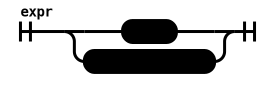

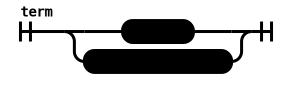

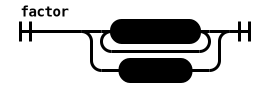

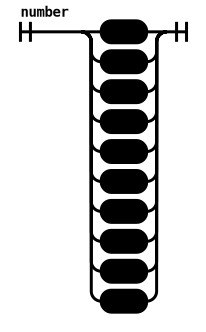

In [179]:
# Display rr diagrams
display_rr(bnf_string)

In [1]:
### Dependencies
%pip install railroad-diagrams

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
